In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from numpy.random import default_rng
rng = default_rng(1234)

# Task 1
Generatong image with horizontal and vertical bar

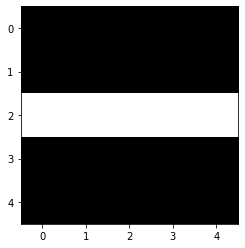

In [27]:
X = np.zeros((5,5))
X[2] = 1
plt.imshow(X,cmap='gray')

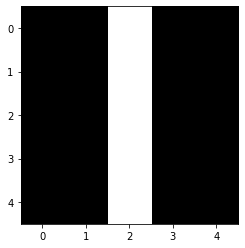

In [28]:
X_neg = np.zeros((5,5))
X_neg[:,2] = 1
plt.imshow(X_neg,cmap='gray')

# Adding noise to image

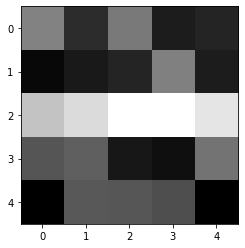

In [47]:
X_noise = np.zeros((5,5))
X_noise[2] = 1
X_noise += rng.uniform(size=(5,5))
plt.imshow(X_noise,cmap = 'gray')

# Task 3 
Generate the base dataset 500 datapoints 250 perclass store them in  

In [74]:
def generate(num,imsize,label,noise_factor):
    '''
    Generate num images of size imsize x imsize with given label
    label = 0 Horizontal
    label - 1 Vertical
    '''
    X = np.zeros((num,imsize,imsize))
    mid = imsize//2
    if(label):
        X[:,:,mid] = 1
    else:
        X[:,mid,:] = 1
        X+= rng.uniform(size = X.shape) *noise_factor
    return X.reshape(num,-1),label*np.ones(num)
    

# Generating the data

In [85]:
X_pos,y_pos = generate(100,5,0,0.5)
X_neg,y_neg = generate(100,5,1,0.5)

X = np.row_stack((X_pos,X_neg))
y = np.concatenate((y_pos,y_neg))

In [86]:
X.shape,y.shape

((200, 25), (200,))

## Train-test-split

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [90]:
assert X_train.shape[0] == y_train.shape[0]

# Logistic Regression Class

### Binary-Crossentropy
$$
l = -y\log{y_{pred}} - (1 - y)\log{(1 - y_{pred})}
$$

### Gradient Calculation

$$
dJdw = X^{T}(y_{pred} - y)

$$

In [91]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def _preprocess(X:np.ndarray):
    # X number of sample,number of features
    return np.column_stack((np.one(X.shape[0]),X))



class LogisticRegression():
    def __init__(self,lr = 0.01):
        self.w = None
        self.lr = lr
        self.losses = []
        
    def loss(self,y_pred,y:np.ndarray):
        return np.sum(-y*np.load(y_pred) - (1 - y)*np.log(1 - y_pred))
    
    
    def fit(self,X:np.ndarray,y:np.ndarray):
        '''
        Gradient Descent
        '''
        _preprocess(X,y,epochs=100)
        self.w = rng.standard_normal(X.shape[-1])
        for i in range(epochs):
            self.w -= self.lr*self.grad(X,y)
            self.loss(self.prob())
            
        
    def predict(self,X:np.ndarray):
        
    
    def prob(self,X:np.ndarray):
        return sigmoid(X@self.w)
    
    def grad(self,X,y):
        return np.transpose(X)@(self.prob(X) - y)
        
        
        
    

IndentationError: expected an indented block (Temp/ipykernel_8504/3382056883.py, line 34)

# Gaussian NB

## Data Generation

In [149]:
X1 = np.random.normal(loc=-1,size = 100).reshape(-1,2)
y1 = np.zeros(100)
X2 = np.random.normal(loc=0,size = 100).reshape(-1,2)
y2 = np.ones(100)
X3 = np.random.normal(loc=1,size = 100).reshape(-1,2)
y3 = np.ones(100)*2

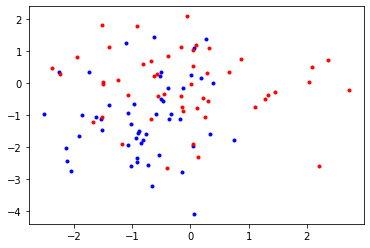

In [151]:
plt.plot(X1[:,0],X1[:,1],'.b')
plt.plot(X2[:,0],X2[:,1],'.r')


In [116]:
X = np.row_stack((X1,X2,X3))
y = np.concatenate((np.concatenate((y1,y2)),y3))

## Plotting the data

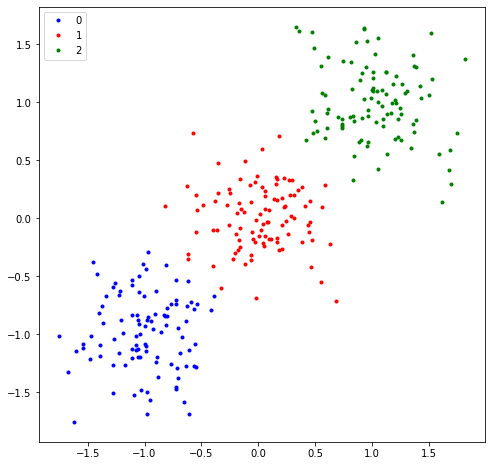

In [184]:
m0,m1,m2 = [-1,-1],[0,0],[1,1]
spred = 0.1
cov = np.eye(2) * spred
x1 = rng.multivariate_normal(m0,cov,100)
x2 = rng.multivariate_normal(m1,cov,100)
x3 = rng.multivariate_normal(m2,cov,100)

plt.figure(figsize=(8,8))
plt.plot(x1[:,0],x1[:,1],'.b',label='0')
plt.plot(x2[:,0],x2[:,1],'.r',label='1')
plt.plot(x3[:,0],x3[:,1],'.g',label='2')
plt.legend()

In [185]:
X = np.row_stack((x1,x2,x3))
y = np.concatenate((np.zeros(x1.shape[0]),np.ones(x1.shape[0]),np.ones(x3.shape[0])*2))

In [186]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [187]:
(X_train.shape,y_train.shape),(X_test.shape,y_test.shape)

(((240, 2), (240,)), ((60, 2), (60,)))

# Gaussain NB

Dimensions:
n_classes =3
n_features = 2
n_samples = 240

In [188]:
def logofnormal(x,mean,var):
    # X is of shape n_samples,n_features 
    out = -0.5 * (np.log(2*np.pi)) + np.log(var)
    exp = -0.5 * (x - mean) **2 / var
    return np.sum(out + exp,axis = 1) 

class GaussainNB():
    def __init__(self):
        self.means = None
        self.vars = None
        self.priors = None
        
    def fit(self,X,y):
        n_samples,n_features = X.shape
        _,class_count = np.unique(y,return_counts=True)
        n_classes = len(class_count)
        self.n_classes = n_classes
        
        self.means =np.zeros((n_classes,n_features))
        self.vars =np.zeros((n_classes,n_features))
        self.priors = class_count/np.sum(class_count)
        
        for c in range(n_classes):
            X_c = X[y == c]
            self.means[c] = X_c.mean(axis = 0)
            self.vars[c] = X_c.var(axis = 0)
                
    
    def predict(self,X):
        n_samples,_ = X.shape
        
        posterior = np.zeros((n_samples,self.n_classes))
        for c in range(self.n_classes):
            posterior[:,c] = np.log(self.priors[c]) + logofnormal(X,self.means[c],self.vars[c])
            
        return np.argmax(posterior,axis = 1)

gnb = GaussainNB()
gnb.fit(X_train,y_train)

In [189]:
y_pred = gnb.predict(X_test)

In [190]:
np.sum(y_test == y_pred)/y_test.shape[0]

0.9833333333333333

In [2]:
X = np.array([
    [1,0],
    [0,1],
    [0,1],
    [1,0]
])
y = np.array([0,1,1,0])

In [3]:
n_samples,n_features = X.shape
print(n_samples,n_features)

4 2


In [8]:
class_counts = np.unique(y)
class_counts

array([0, 1])

In [10]:
d ={}
for i in class_counts:
    d[i] = 0
    
print(d)

{0: 0, 1: 0}


In [18]:

for i in class_counts:
    X_c = X[y==i]
    d[i] = (np.var(X_c,axis=1))
    

In [19]:
d

{0: array([0.25, 0.25]), 1: array([0.25, 0.25])}

In [15]:
y.shape

(4,)

# Bernoulli NB by Shubham Harkare

$$
p(y = y_{c}|x) = \frac{p(y_{c}) \times p(\mathbf{x}|y)}{p(\mathbf{x})}
$$

$p(y_{c})$ = Prior Probability(**Number of examples label vectors belonging to class $y_{c}$ by total number of examples in the set**)

$p(\mathbf{x}|y)$ = CLass Conditional Densities

### Prediction

- For prediction we use the following loss function

### $$y = argmax_{y}Xlogw^{T} + (1-X)log(1- w^{T}) + log w_{prior}$$

In [245]:
class BernoulliNB():
    def fit(self,X,y):
        n_samples,n_features = X.shape #n_samples -> Number of examples in the feature matrix
        # n_features -> Number of features in the feature matrix
        n_classes,class_counts = np.unique(y,return_counts=True) # n_classes -> number of unique classes present in the dataset
        self.priors = class_counts/np.sum(class_counts) #Priors calculate the probability of number of labels of a certain class 
        # divided by the total number of examples of the dataset
        
        self.w = np.zeros((len(n_classes),n_features),dtype = np.float64)
        for i in n_classes:
            X_c = X[y==i]
            # Iterating over all labels for all the labels in the class
            # The weight matrix looks as follows:
            #                        X0      X1
            #                   Y0  p(X0|y0) p(X1|y0)
            #                   Y1  p(x0|y1) p(X1|y1)
            self.w[i,:] = (np.sum(X_c,axis = 0)+ 1)/(X_c.shape[0] +2)
            
        return self.w,self.priors
        
        
    def log_likelihood(self,X:np.ndarray):
        e1 = X@np.log(self.w.T)  
        e2 = (1-X)@np.log(1 - w.T)  
        return e1+e2+ np.log(self.priors)
    
    def predict(self,X:np.ndarray):
        return np.argmax(self.log_likelihood(X),axis =1)

In [246]:
X = np.array([[1,0],[0,1],[0,1],[1,0]])
y = np.array([1,0,0,1])


In [247]:
bnb = BernoulliNB()

In [248]:
class_conditional_densities,priors = bnb.fit(X,y) 

In [249]:
llh = bnb.log_likelihood(X)

In [250]:
bnb.predict(X)

array([1, 0, 0, 1], dtype=int64)

In [170]:
class_conditional_densities,priors

(array([[0.25, 0.75],
        [0.75, 0.25]]),
 array([0.5, 0.5]))

In [171]:
w.shape,w.T.shape

((3, 2), (2, 3))

In [184]:
w_log = np.log(class_conditional_densities.T)

In [185]:
class_conditional_densities.shape,w_log.shape

((2, 2), (2, 2))

In [186]:
X@w_log

array([[-1.38629436, -0.28768207],
       [-0.28768207, -1.38629436],
       [-0.28768207, -1.38629436],
       [-1.38629436, -0.28768207]])

# Gaussian NB By Shubham Harkare

- In Gaussian NB the The class conditional densities follow Gaussian Distribution

$$x_{j}|y_{r} \sim \mathcal{N}(\mu,\,\sigma^{2})\$$

$\mu_{m \times 1}$ = means of  m  feature

$\sum_{m \times m}$ = Covariance matrix

The Diagonal entries in the covariance matrix are the variances 

In [288]:
class GaussianNB():
    def class_scores(self,y_hat,y):
        '''
        Function that provides all the evaluation metrics such as precsion,recall and accuracy
        '''
        tp = np.sum()
    
    
    def fit(self,X:np.ndarray,y:np.ndarray):
        n_samples,n_features = X.shape
        n_classes,class_count = np.unique(y,return_counts=True)
        # There are n_features and n_classes in the given dataset therefore 
        self.means =  np.zeros((len(n_classes),n_features),dtype = np.float64)
        self.vars = np.zeros((n_features,n_features),dtype = np.float64)
        self.priors = class_count/np.sum(class_count)
        
        for i in n_classes:
            X_c = X[y == i]
            self.means[i,:] = np.mean(X_c)
            self.vars[i,:] = np.var(X_c)
            
        return self.means,self.vars,self.priors
    
    def _pdf(self,X:np.ndarray,mean,var):
        '''
        This function calculates the log of normal distribution given the feature matrix
        it's corresponding mean vector and covariance matrix
        '''
        out = -0.5*(np.log(2*np.pi)) + np.log(var)
        exp = -0.5*(X - mean)**2/var
        return np.sum(out+exp,axis = 1)
    
    def predict(self,X):
        n_samples,n_features = X.shape
        n_classes,class_count = np.unique(y,return_counts=True)
        # Posteriors are p(y|x) and there shape is n_classes x n_features
        posterior = np.zeros((n_samples,len(n_classes)),dtype= np.float64)
        for c in n_classes:
            posterior[:,c] = np.log(self.priors[c]) + self._pdf(X,self.means[c,:],self.vars[c,:])
            
        return np.argmax(posterior,axis = 1)
    
        
            

In [289]:
gnb = GaussianNB()

In [290]:
gnb.fit(X_train,y_train)

(array([[ 4.88766086,  4.88766086],
        [10.04101716, 10.04101716]]),
 array([[2.6280826 , 2.6280826 ],
        [2.25586372, 2.25586372]]),
 array([0.525, 0.475]))

In [291]:
gnb.predict(X_test)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
      dtype=int64)

In [292]:
y_test

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0])

# Example working

In [237]:
X = np.array([[1,0],[0,1],[0,1],[1,0]])
y = np.array([1,0,0,1])


In [226]:
w,w_priors = bnb.fit(X,y)

In [228]:
e1 = X@np.log(w.T)
e1.shape

(4, 2)

In [229]:
e2 = (1 - X)@np.log(1 - w.T)
e2.shape

(4, 2)

In [231]:
e1+e2

array([[-2.77258872, -0.57536414],
       [-0.57536414, -2.77258872],
       [-0.57536414, -2.77258872],
       [-2.77258872, -0.57536414]])

In [232]:
w.shape

(2, 2)

In [253]:
from sklearn.datasets import make_classification,make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=100,n_features=2,centers=[[5,5],[10,10]],cluster_std=1.5,random_state=2)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=133)

In [255]:
n_classes,class_count = np.unique(y_train,return_counts=True)

In [256]:
priors = class_count/np.sum(class_count)

array([0.525, 0.475])

In [261]:
for i in n_classes:
    print(np.mean(X[y == i],axis = 0))

[4.55327074 5.13550586]
[10.33985583 10.04486762]


In [260]:
n_samples,n_features = X.shape
n_features

2

In [263]:
a = np.array([[1,2],[3,4]])

In [265]:
np.mean(a,axis = 0)

array([2., 3.])